# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


# **Students** (First Name and Last Name)

1.   Eva Veli
2.   Tatevik Davtyan

---

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology,img_as_float
from skimage.morphology import disk
from skimage.filters.rank import mean
import cv2
import skimage


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


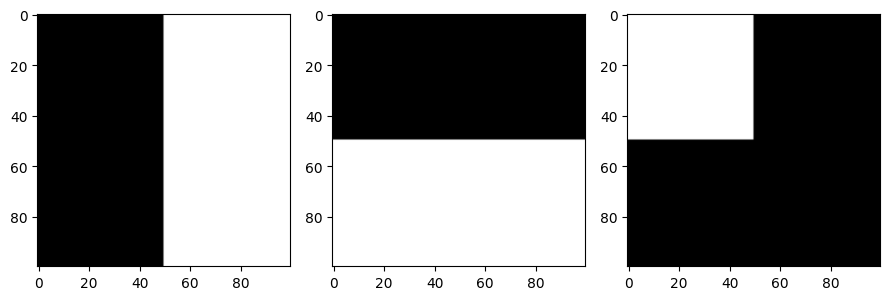

In [ ]:
# Function to create the three images
def create_images():
    # Creating the first image
    image1 = np.zeros((100, 100))
    image1[:, 50:] = 255

    # Creating the second image
    image2 = np.zeros((100, 100))
    image2[50:, :] = 255

    # Creating the third image
    image3 = np.zeros((100, 100))
    image3[:50, :50] = 255

    # Return the three images
    return image1, image2, image3

# Calling the function to create the three images
image1, image2, image3 = create_images()


# Display the images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Visualize each created image
axes[0].imshow(image1, cmap='gray')


axes[1].imshow(image2, cmap='gray')


axes[2].imshow(image3, cmap='gray')


# Show the plot
plt.tight_layout()
plt.show()

[link text](https://)*   Use the above three images to create the following image

---



![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

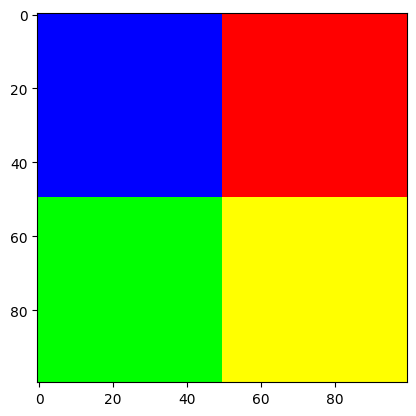

In [ ]:
# 100 X 100 image , with 3 color channels RGB
img_combined = np.zeros((100, 100, 3), dtype=np.uint8)

# Apply blue to the entire left half of the first image
img_combined[:50, :50][image1[:50, :50] == 0] = [0, 0, 255]

# Apply red to the entire right half of the second image
img_combined[:, 50:][image2[:, 50:] == 0] = [255, 0, 0]

# Apply yellow to the bottom-right quadrant of the third image
img_combined[50:, 50:][image3[50:, 50:] == 0] = [255, 255, 0]

# Apply green to the bottom-left quadrant of the third image
img_combined[50:, :50][image3[50:, :50] == 0] = [0, 255, 0]

plt.imshow(img_combined)
plt.axis('on')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



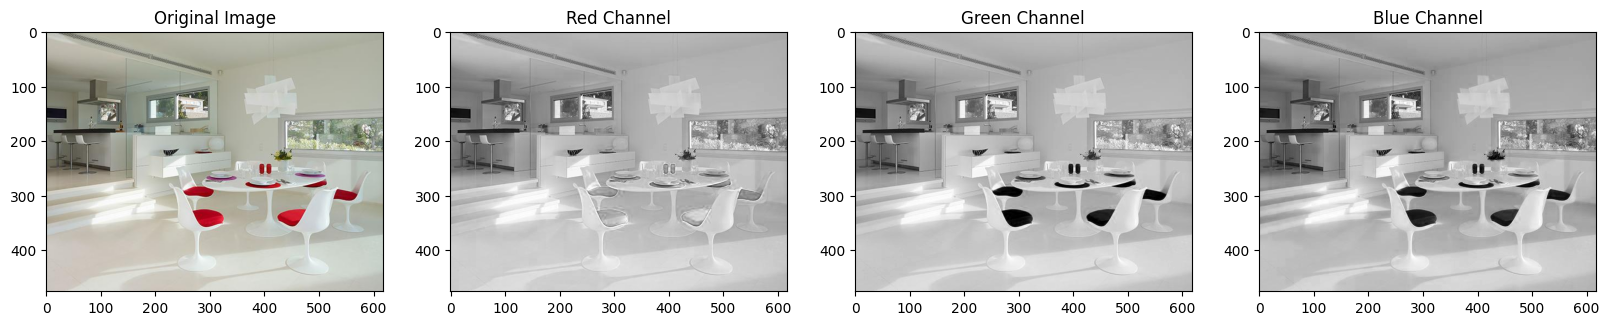

In [ ]:
# solution
image = cv2.imread('images/sillas.jpg')
red_channel = image[:,:,2]
green_channel = image[:,:,1]
blue_channel = image[:,:,0]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(red_channel,cmap='gray')
axs[1].set_title('Red Channel')

axs[2].imshow(green_channel,cmap='gray')
axs[2].set_title('Green Channel')

axs[3].imshow(blue_channel,cmap='gray')
axs[3].set_title('Blue Channel')


plt.show()

* Create a new image and **swap the 'red' and 'blue' channels**
* Visualize the original image and the created image using matplotlib subplot.



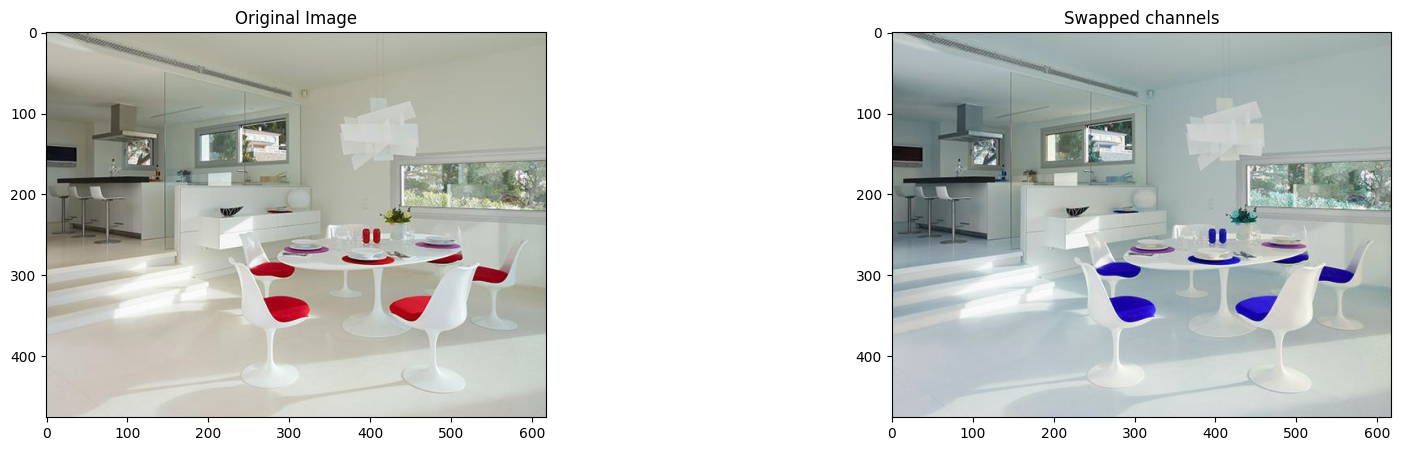

In [ ]:
# solution
image_swaped = image.copy()
image_swaped[:,:,0] = red_channel
image_swaped[:,:,2] = blue_channel
image_swaped_rgb = cv2.cvtColor(image_swaped, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(image_swaped_rgb)
axs[1].set_title('Swapped channels')


plt.show()


*   Now lets change specific areas of the picture.
*   The color **red** of the chair and the table looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**. *Hint: Play with the matrices here, Think masks!!!*
*   Visualize the original image and the created image using matplotlib subplot.

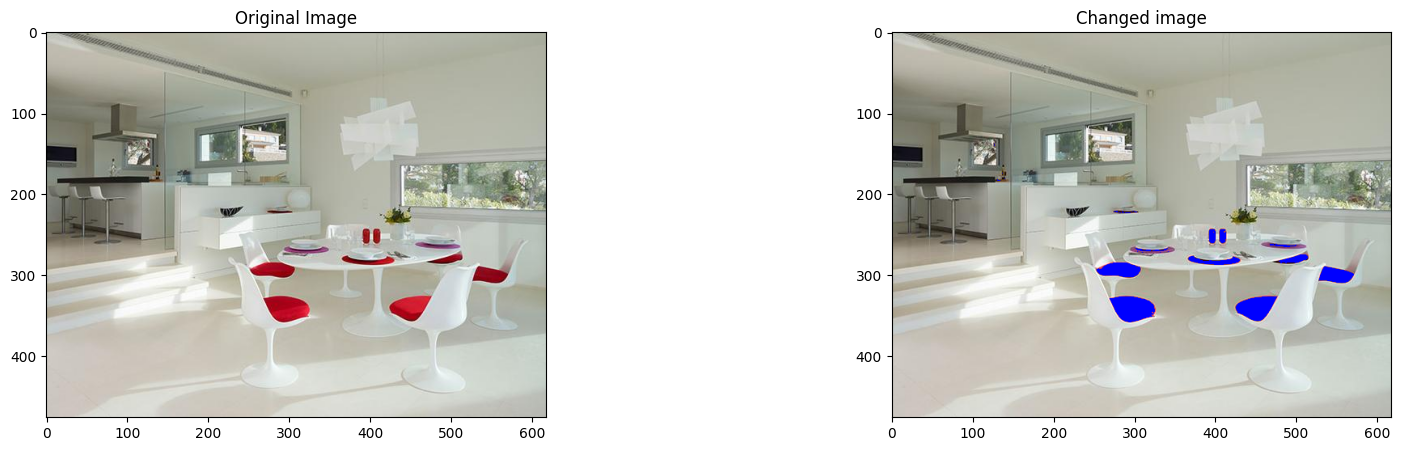

In [ ]:
# solution
changed_image = image.copy()
changed_image[(red_channel>60) & (green_channel<50) & (blue_channel<110) ] = [255,0,0]
changed_image = cv2.cvtColor(changed_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(changed_image)
axs[1].set_title('Changed image')


plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


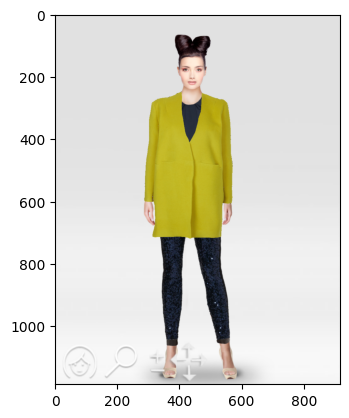

In [ ]:
model_bgr = cv2.imread('images/model.png')
coat_bgr = cv2.imread('images/coat.png')

model_bgr_changed = model_bgr.copy()
model_bgr_changed[coat_bgr>0] = 0
model_bgr_changed = model_bgr_changed+coat_bgr
model_bgr_changed = cv2.cvtColor(model_bgr_changed, cv2.COLOR_BGR2RGB)
plt.imshow(model_bgr_changed)

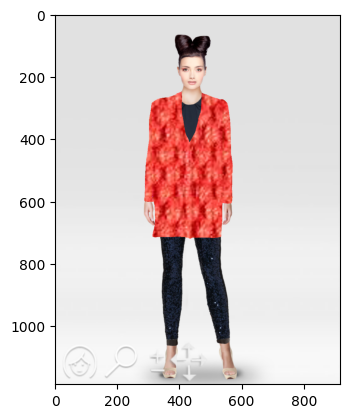

In [ ]:
texture = cv2.imread('images/texture2.png')
# Resize texture to match model's dimensions
texture = cv2.resize(texture, (model_bgr.shape[1], model_bgr.shape[0]))
# Create a mask where coat_bgr has non-zero pixels
mask = coat_bgr > 0
# Apply the texture to the model image where mask is True
model_bgr[mask] =texture[mask]
model= cv2.cvtColor(model_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(model)

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib bar plot.




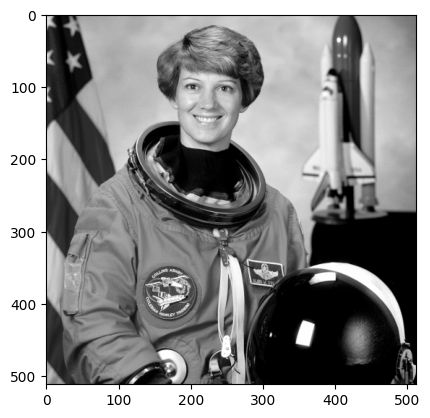

In [ ]:
# solution
image = skimage.data.astronaut()
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_grayscale,cmap='gray')

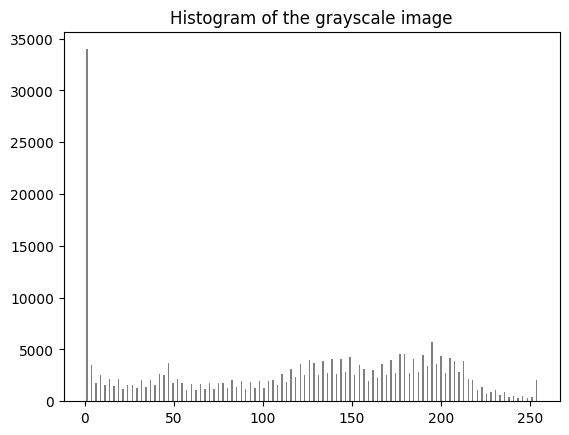

In [ ]:
image_grayscale  = img_as_float(image_grayscale)
histogram, bin_centers = exposure.histogram(image_grayscale,nbins = 100)
plt.bar(bin_centers*255,histogram,color='gray')
plt.title('Histogram of the grayscale image')
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib bar plot.

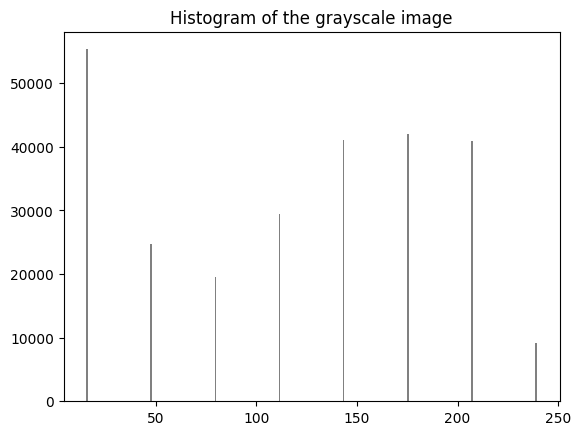

In [ ]:
# solution
image_grayscale  = img_as_float(image_grayscale)
histogram, bin_centers = exposure.histogram(image_grayscale,nbins = 8)

plt.bar(bin_centers*255,histogram,color='gray')
plt.title('Histogram of the grayscale image')
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Since the image ( grayscaled) contains a big number of black pixels, in both of the histograms, the highest pick is the bin containing 0 (black pixel) even if decreasing the number of bins. However, the other values are smoothed when using a small number of bins. Certain details are lost when using small number of bins, so it is better to start from a small number of bins and gradually increase it until we lose some essential details. In this case, if small changes are essential for us, choosing nbins = 100 would be suitable, if we need  general changes to be depicted in the histgram, we can choose nbin = 8.

When the bin bount is very low, the range of pixels is devided into lower chunks, and, as a result, certail small details are lost. When having the bin count very high, we can depict some noises, as the ranges of each bin will be very small and change of color could be noticable even if it is a noise.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single stairs plot with differnt legends for each histogram).


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


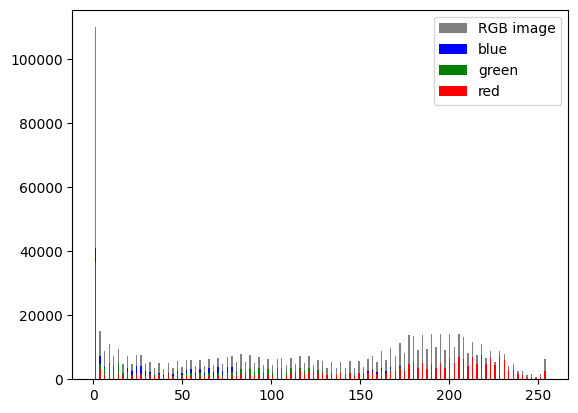

In [ ]:
#solution
image  = img_as_float(image)
histogram, bin_centers = exposure.histogram(image, nbins=100)
histogram_blue, bin_centers_blue = exposure.histogram(image[:,:,2], nbins=100)
histogram_green, bin_centers_green = exposure.histogram(image[:,:,1], nbins=100)
histogram_red, bin_centers_red = exposure.histogram(image[:,:,0], nbins=100)

plt.bar(bin_centers*255,histogram,color='gray',label = 'RGB image')
plt.bar(bin_centers_blue*255,histogram_blue,color='blue',label = 'blue')
plt.bar(bin_centers_green*255,histogram_green,color='green',label = 'green')
plt.bar(bin_centers_red*255,histogram_red,color='red',label = 'red')
plt.legend()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



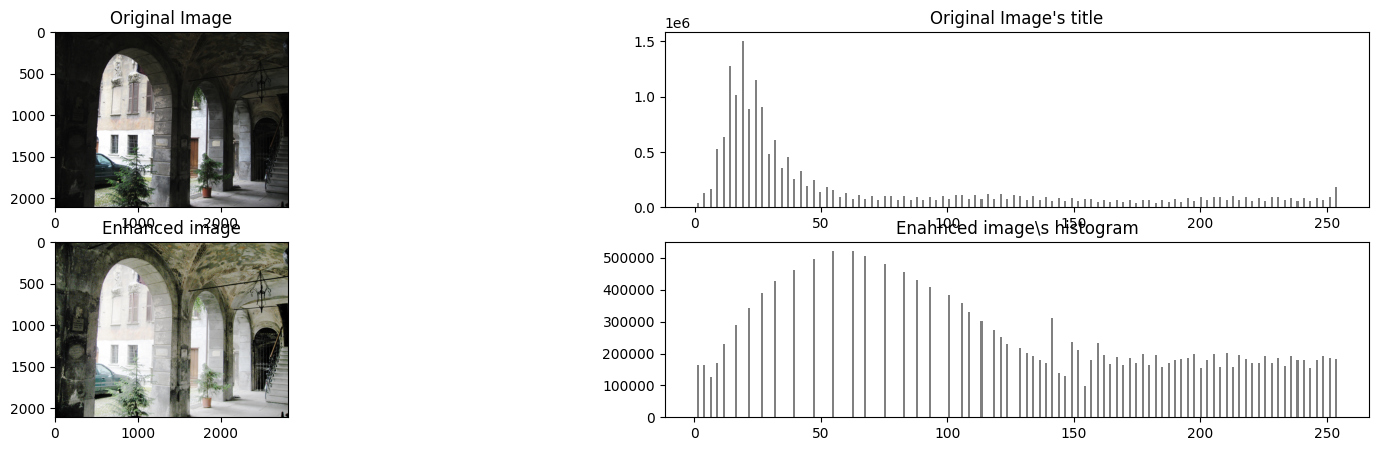

In [ ]:
# solution
image = cv2.imread('images/aquatermi_lowcontrast.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hist_equalized = exposure.equalize_hist(image)
image  = img_as_float(image)

histogram, bin_centers = exposure.histogram(image, nbins=100)
histogram_eq, bin_centers_eq = exposure.histogram(image_hist_equalized, nbins=100)

fig, axs = plt.subplots(2, 2, figsize=(20, 5))

axs[0,0].imshow(image)
axs[0,0].set_title('Original Image')

axs[0,1].bar(bin_centers*255,histogram,color='gray',label = 'RGB image')
axs[0,1].set_title('Original Image\'s title')

axs[1,0].imshow(image_hist_equalized)
axs[1,0].set_title('Enhanced image')

axs[1,1].bar(bin_centers_eq*255,histogram_eq,color='gray',label = 'RGB image')
axs[1,1].set_title('Enahnced image\s histogram')


plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Linear contrast stretch is using min and max of the pixels to normalize the histigram of low-contrast image.


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and range of brightness values as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# solution
def linear_contrast_stretching(image,range_):

    min_ = image.min()
    max_ = image.max()

    changed_img = (((image - min_)/(max_ - min_))*range_).astype(np.uint8)
    return changed_img


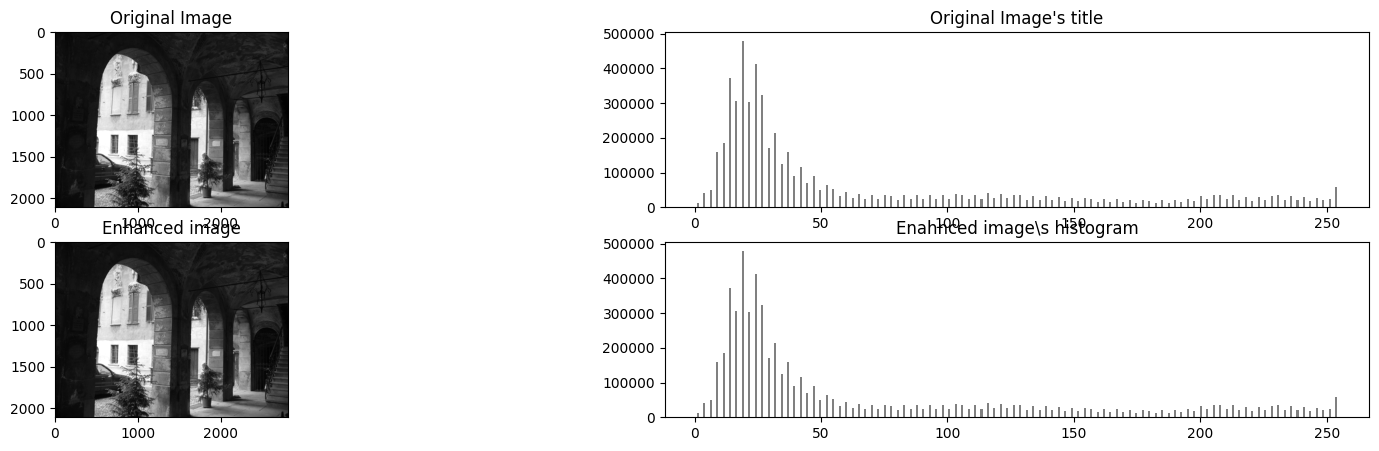

In [ ]:
image = cv2.imread('images/aquatermi_lowcontrast.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_stretched = linear_contrast_stretching(image,255)

image  = img_as_float(image)
image_stretched  = img_as_float(image_stretched)

histogram, bin_centers = exposure.histogram(image, nbins=100)
histogram_str, bin_centers_str= exposure.histogram(image_stretched, nbins=100)

fig, axs = plt.subplots(2, 2, figsize=(20, 5))

axs[0,0].imshow(image,cmap = 'gray')
axs[0,0].set_title('Original Image')

axs[0,1].bar(bin_centers*255,histogram,color='gray',label = 'RGB image')
axs[0,1].set_title('Original Image\'s title')

axs[1,0].imshow(image_stretched,cmap = 'gray')
axs[1,0].set_title('Enhanced image')

axs[1,1].bar(bin_centers_str*255,histogram_str,color='gray',label = 'RGB image')
axs[1,1].set_title('Enahnced image\s histogram')


plt.show()

* How different is a linear **selective** contrast stretch?

**Solution**

The difference is that in case of Selective contrast stretch, you can also give a MINout and MAXout instead of just a range of brightness values, which results in an image with the required min and max, so we don't stretch it as much as in case of linear cntrast stretching using only a range of brightness values as parameters.

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem / footprint) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 (radius=30) and apply the mean filter.
*   Reduce the radius of the selem by 10 (radius=10) and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




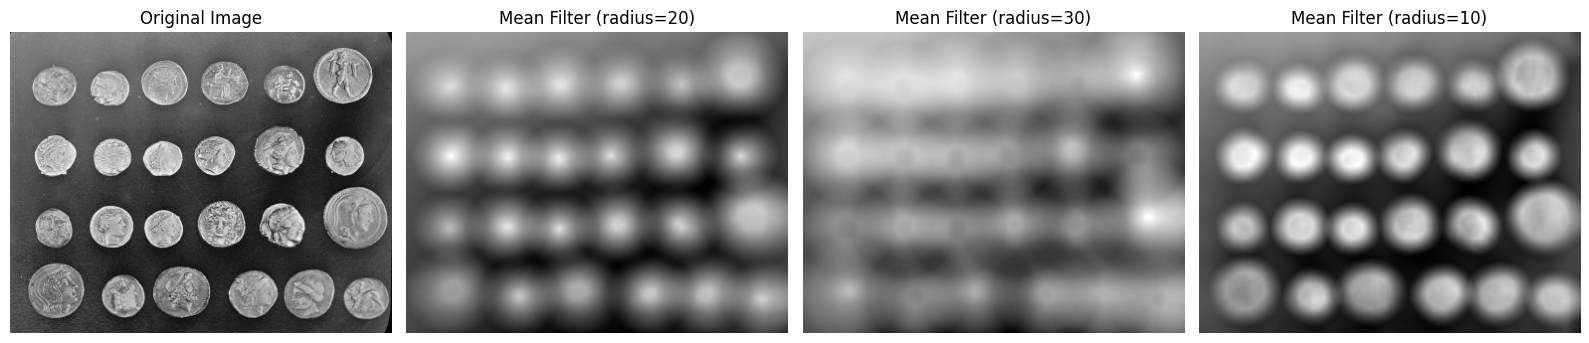

In [ ]:
from skimage import data, filters, morphology
from skimage.filters import rank
import matplotlib.pyplot as plt

# Load the coins image
image = data.coins()

# Define disk structuring elements with different radius
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

# Apply the mean filter using the structuring elements
filtered_20 = rank.mean(image, footprint=selem_20)
filtered_30 = rank.mean(image, footprint=selem_30)
filtered_10 = rank.mean(image, footprint=selem_10)

# Plot the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(16, 8))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(filtered_20, cmap='gray')
axes[1].set_title('Mean Filter (radius=20)')
axes[1].axis('off')

axes[2].imshow(filtered_30, cmap='gray')
axes[2].set_title('Mean Filter (radius=30)')
axes[2].axis('off')

axes[3].imshow(filtered_10, cmap='gray')
axes[3].set_title('Mean Filter (radius=10)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


*   Use different selem / footprint (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

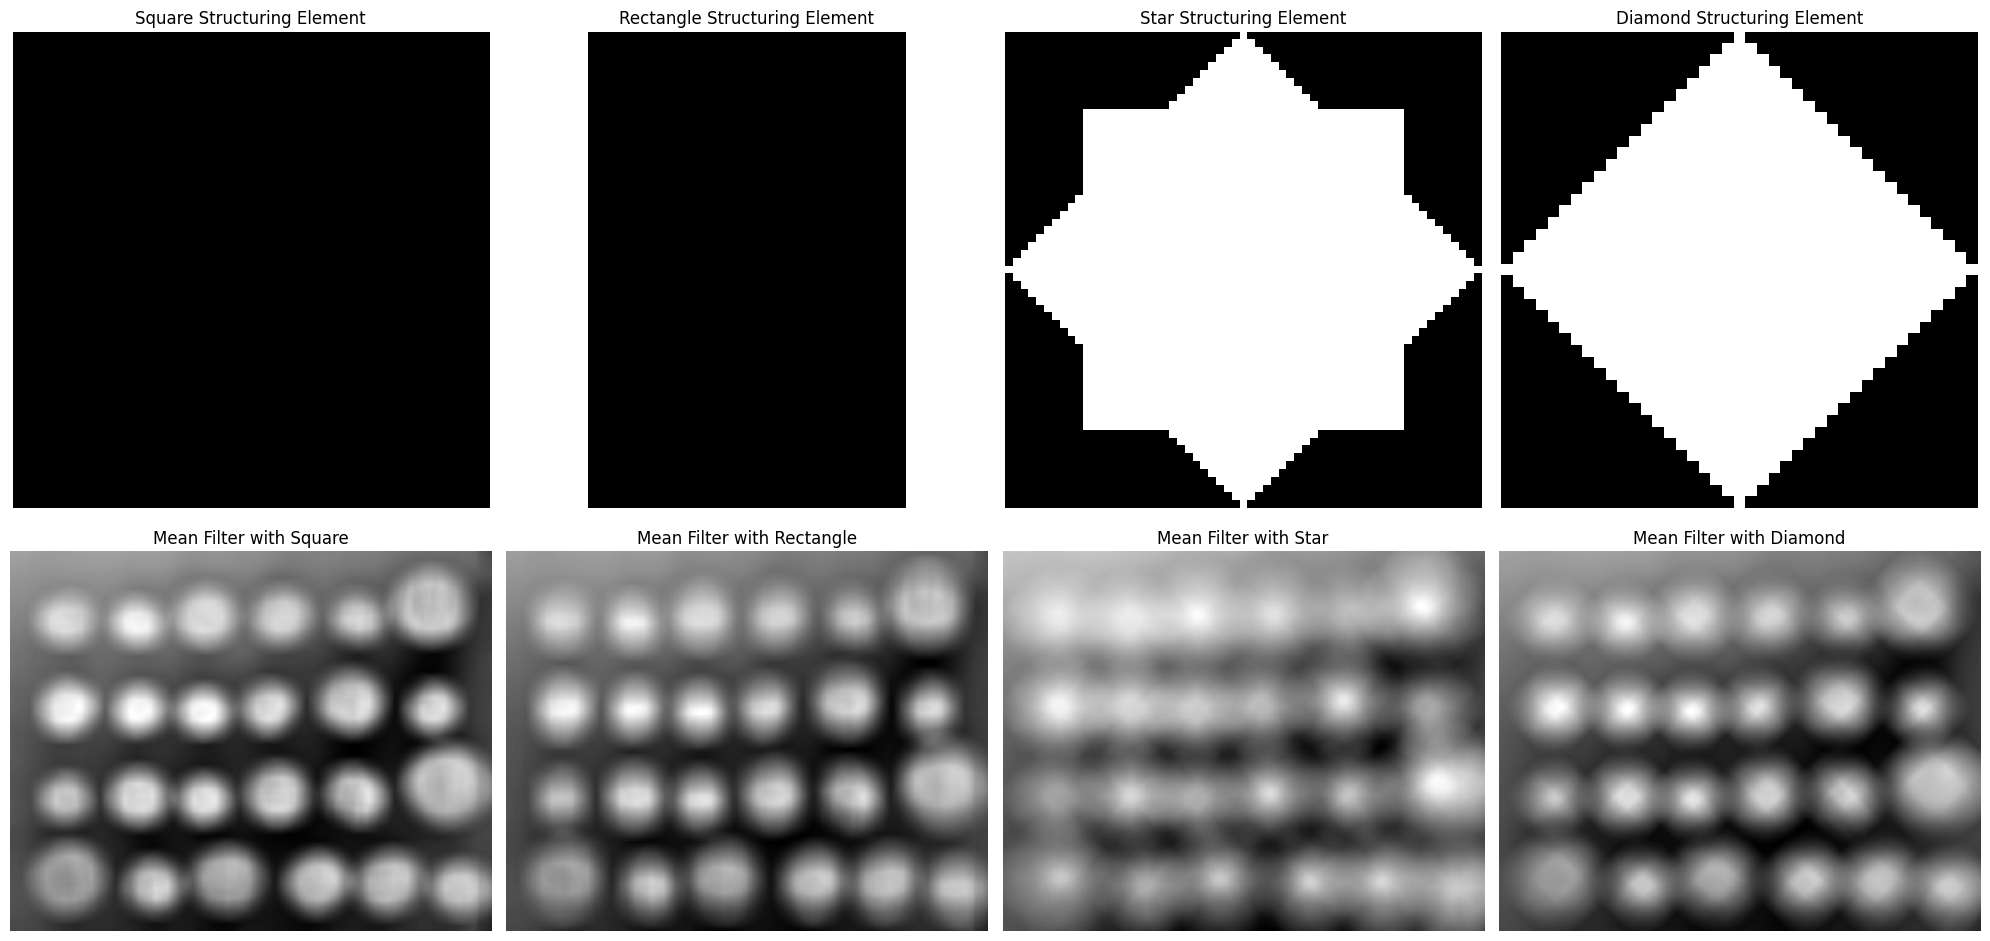

In [ ]:
from skimage import data, filters, morphology
from skimage.filters import rank
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt

# Load the coins image
image = data.coins()

# Define different structuring elements
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(30, 20)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Apply the mean filter using different structuring elements
filtered_square = rank.mean(image, footprint=selem_square)
filtered_rectangle = rank.mean(image, footprint=selem_rectangle)
filtered_star = rank.mean(image, footprint=selem_star)
filtered_diamond = rank.mean(image, footprint=selem_diamond)

# Structuring elements and corresponding filtered images
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
filtered_images = [filtered_square, filtered_rectangle, filtered_star, filtered_diamond]
titles = ['Square', 'Rectangle', 'Star', 'Diamond']

# Plot the structuring elements and corresponding filtered images
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (selem, filtered, title) in enumerate(zip(selems, filtered_images, titles)):
    # First row: show the structuring elements
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f'{title} Structuring Element')
    axes[0, i].axis('off')

    # Second row: show the filtered images
    axes[1, i].imshow(filtered, cmap='gray')
    axes[1, i].set_title(f'Mean Filter with {title}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()



How does changing the radius of disk affect the smoothing functionality?

**Solution**

As we can see from the produced images, when the radius is higher the image is more smoothed because more neighboring pixels are considered for averaging. But the larger the neighborhood, the better the filter is at reducing noise, but this comes at the cost of losing finer image details.

When the radius is smaller the smoothing effect is more localized because fewer neighboring pixels are considered.The smaller neighborhood doesn't have as much power to reduce noise, so some noise might still be visible, but the image has more fine details compared to the other one.


What is the observed behaviour with difference in the structuring element?



**Solution**

*Square Shape* - It applies uniform smoothing in all directions within the neighborhood. The filtered image consist of noise reduction and minor details in a uniform way. Edges and features are blurred in the same way in all directions.

*Rectangle Shape* - It applies more smoothing along the longer side of the rectangle. Since our rectangle has a size of 30x20 , the filtered image experiences more smoothing along the vertical direction. This results in vertical features being more blurred than horizontal ones. Horizontal edges and features remain relatively sharper compared to vertical ones.

*Star Shape* - It focuses on preserving central pixels while including multiple directional neighbors. The filtered image results in better preservation of edges and features in multiple directions. The smoothing effect is balanced, maintaining sharper transitions in different orientations.

*Diamond Shape* - It provides a smoothing similar to the square but emphasizes pixels in a diamond-shaped neighborhood.The filtered image consists in uniform blurring but with a focus in the cardinal directions. This can lead to better edge preservation along these axes while still effectively reducing noise.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**
1. Mean Filter (or Box Filter)

The mean filter works by taking the average of all pixel values within a defined neighborhood (kernel). For example, in a 3×3 kernel, it computes the mean of the 9 pixels in that area and replaces the center pixel with this average value. This results in a uniform blur.
Each pixel in the kernel contributes equally to the result.It tends to blur both high-frequency noise and edges. It’s computationally inexpensive but less effective for preserving details.

2. Gaussian Filter

The Gaussian filter uses a Gaussian function to assign different weights to the pixels in the neighborhood. Pixels closer to the center of the kernel are given higher weights, and those further away get lower weights. The smoothing is determined by a parameter called the standard deviation (σ), which controls the spread of the Gaussian curve.
It results in a smoother blur that is less aggressive than the mean filter. The Gaussian filter smooths out noise while preserving some level of edges due to the weighted averaging.The weighting is based on distance from the center, with nearby pixels having a larger influence.
It’s more effective at reducing high-frequency noise while preserving edges compared to the mean filter and it requires more computation due to the weighting of pixels, but it produces more natural-looking results.


Use mean filters when simplicity, speed, and basic noise reduction are the primary goals.
Use Gaussian filters when higher-quality smoothing is required, especially in applications and tasks where preserving details is crucial.


---

## **End of P2: Image operators and filters**

This notebook is part of **Deliverable 1**

Deadline for Deliverable 1 (P2 and P3) submission in CampusVirtual is: **Monday, the 14th of October, 2024**
